In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
df_begin=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports.csv')
df_begin

,timestamp,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.PrbTotUl,RRU.PrbTotDl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,S1/B2/C1,0.278192,0.278192,81.459016,81.459016,100,100,81.459016,81.459016,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,S7/B2/C1,0.146310,0.146310,50.000000,50.000000,100,100,50.000000,50.000000,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,S8/B2/C1,0.220303,0.220303,64.300000,64.300000,100,100,64.300000,64.300000,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,S9/B2/C1,0.186428,0.186428,80.900000,80.900000,100,100,80.900000,80.900000,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,S1/B13/C1,0.000000,0.000000,0.000000,0.000000,75,75,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,S3/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,S3/N77/C3,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,S4/N77/C1,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,S4/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [3]:
df_1=df_begin[[ 'timestamp', 'RRU.PrbUsedDl','RRU.PrbUsedUl']].copy()
df_1['Date']=pd.to_datetime(df_1['timestamp'], dayfirst=True, unit='s',origin='unix')
df_1.drop(columns='timestamp', inplace=True)
df_1.set_index('Date', inplace=True)
df_1

,RRU.PrbUsedDl,RRU.PrbUsedUl
Date,,
2022-12-31 16:00:00,81.459016,81.459016
2022-12-31 16:00:00,50.000000,50.000000
2022-12-31 16:00:00,64.300000,64.300000
2022-12-31 16:00:00,80.900000,80.900000
2022-12-31 16:00:00,0.000000,0.000000
...,...,...
2023-01-07 15:59:00,0.000000,0.000000
2023-01-07 15:59:00,0.000000,0.000000
2023-01-07 15:59:00,0.000000,0.000000


In [4]:
df_2= df_1.resample('min').mean()

df_2

,RRU.PrbUsedDl,RRU.PrbUsedUl
Date,,
2022-12-31 16:00:00,41.647609,40.984468
2022-12-31 16:01:00,42.121474,41.068910
2022-12-31 16:02:00,41.851282,40.958333
2022-12-31 16:03:00,42.577885,41.491026
2022-12-31 16:04:00,43.626603,42.665705
...,...,...
2023-01-07 15:55:00,42.102244,41.227244
2023-01-07 15:56:00,40.426282,39.726282
2023-01-07 15:57:00,40.190705,40.190705


In [5]:
df_final=df_2.astype('float32').copy()

y_train=df_final[['RRU.PrbUsedDl','RRU.PrbUsedUl']].loc['2022-12-31':'2023-01-06']
#x_train=df_final.loc['2022-12-31':'2023-01-06'].drop(columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'])
x_train=df_final.loc['2022-12-31':'2023-01-06']

y_validation=df_final[['RRU.PrbUsedDl','RRU.PrbUsedUl']].loc['2023-01-07':].iloc[:]
# x_validation = df_final.loc['2023-01-07':].drop(columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl']).iloc[:-2]
x_validation = df_final.loc['2023-01-07':].iloc[:]
print("shape y_train:", y_train.shape, "shape x_train:", x_train.shape, "shape y_validation:", y_validation.shape, "shape x_validation:", x_validation.shape)

shape y_train: (9120, 2) shape x_train: (9120, 2) shape y_validation: (960, 2) shape x_validation: (960, 2)


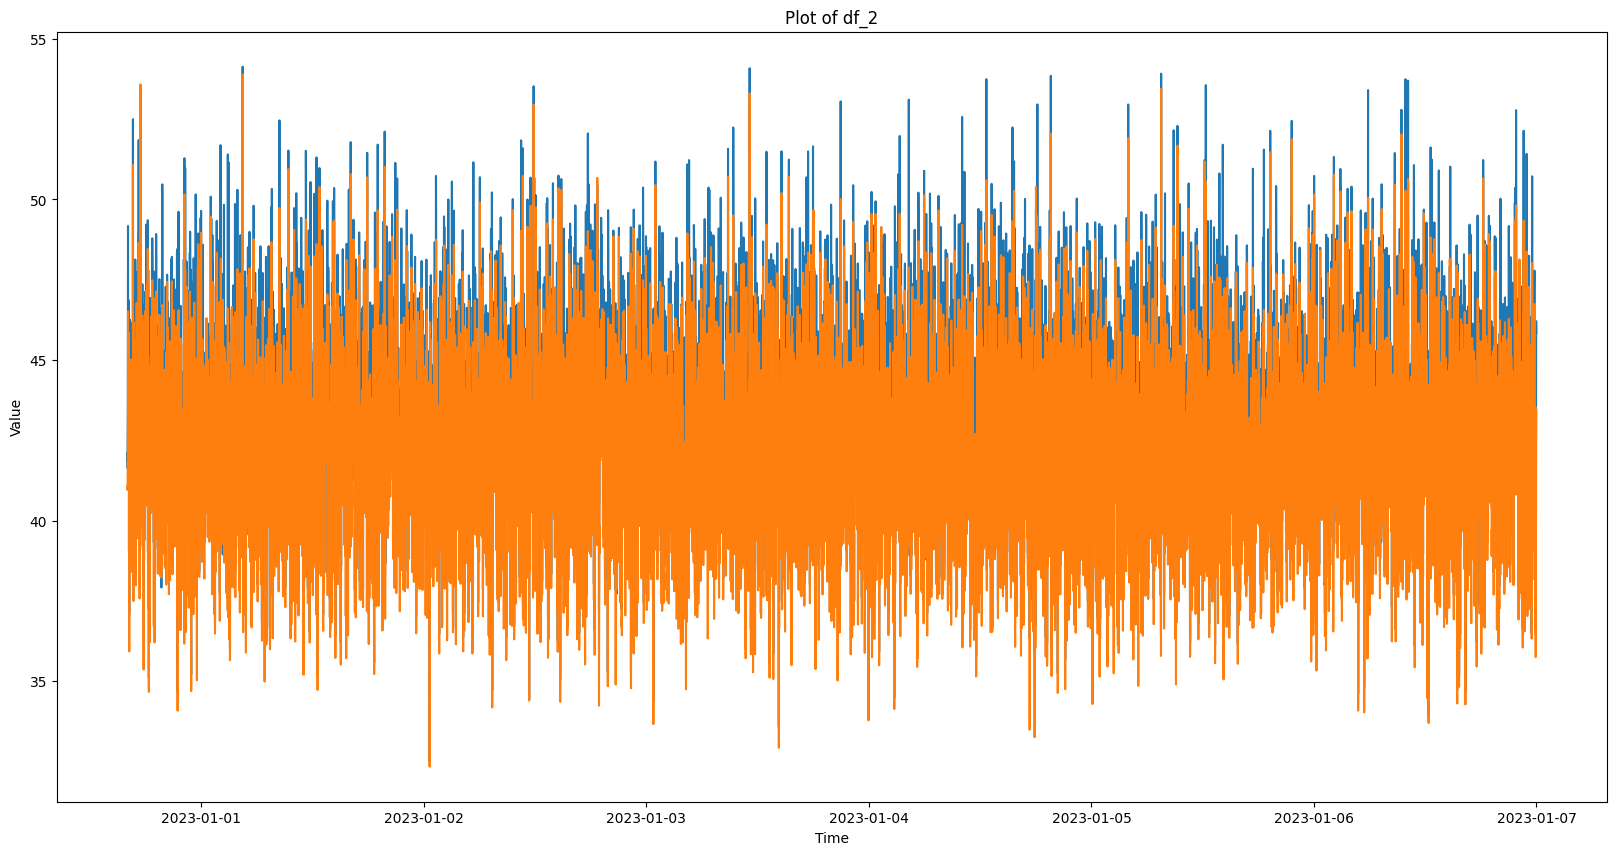

In [6]:
import matplotlib.pyplot as plt

# Assuming df_2 is your DataFrame
plt.figure(figsize=(20, 10))  # Set the figure size
plt.plot(y_train[:]) # Plot the DataFrame; it automatically uses the datetime index for the x-axis
plt.title('Plot of df_2')  # Set the title of the plot
plt.xlabel('Time')  # Set the label for the x-axis
plt.ylabel('Value')  # Set the label for the y-axis
plt.show()  # Display the plot

In [7]:
from sklearn.preprocessing import  StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
def scaler_data(data): 
    scaler = StandardScaler()
    data_scaled= scaler.fit_transform(data)
    return data_scaled, scaler


def split_input_to_timestep(data, timestep):
    x_dictionary = {}
    for i in range(0,data.shape[1]):
        x_dictionary['x%d'%i] = [data[_:_+timestep, i] for _ in range(data.shape[0] - timestep+1)]
    x_final =np.stack(list(x_dictionary.values()), axis=2)
    return x_final

def y_split_input_to_timestep(data, timestep):
    x_dictionary = {}
    for i in range(0,data.shape[1]):
        x_dictionary['x%d'%i] = [data[_:_+timestep, i] for _ in range(data.shape[0] - timestep+1)]
    x_final =np.stack(list(x_dictionary.values()), axis=2)
    return x_final

def tensorflow_lstm(X_train_scaled, Y_train_scaled, X_validation_scaled, Y_validation_scaled, 
                    learning_rate, target_MAE,  jumlah_epochs, jumlah_sampel_batch,
                    jumlah_epoch_terbelakang,  save_best_model_path, validation_data=False,load_model=None):
    global model
    class MAEStopCallback(tf.keras.callbacks.Callback):
        def __init__(self, threshold):
            super(MAEStopCallback, self).__init__()
            self.threshold = threshold

        def on_epoch_end(self, epoch, logs=None):
            if logs['mae'] < self.threshold:
                print(f"\nMAE reached below {self.threshold}. Stopping training.")
                self.model.stop_training = True


    time_step=X_train_scaled.shape[1]
    jumlah_fitur=X_train_scaled.shape[2]
    n_output_features= 2
    model = tf.keras.models.Sequential()
    if load_model==None:
        model.add(tf.keras.layers.LSTM(units=120, input_shape=(time_step, jumlah_fitur), return_sequences=True))
        model.add(tf.keras.layers.LSTM(units=120, return_sequences=True))
        model.add(tf.keras.layers.LSTM(units=120, return_sequences=True))
        model.add(tf.keras.layers.LSTM(units=120, return_sequences=False))
        model.add(tf.keras.layers.Dense(time_step* n_output_features, activation='relu'))
        model.add(tf.keras.layers.Dense(time_step* n_output_features, activation='linear'))
    else:
        model = tf.keras.models.load_model(load_model)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae'])
    mae_stop_callback = MAEStopCallback(threshold=target_MAE) 

    # Add ModelCheckpoint
    checkpoint_callback = ModelCheckpoint(
        save_best_model_path,
        monitor='val_mae',     
        mode='min',         # Mode is set to minimize the monitored quantity 
        save_best_only=True, # Only save the best model
        verbose=1            # Show messages about the model saving
    )
    # Add EarlyStopping 
    early_stopping_callback = EarlyStopping(
        monitor='val_mae',     
        mode='min',         # Mode is set to minimize the monitored quantity 
        patience=jumlah_epoch_terbelakang,    # Number of consecutive epochs with no improvement after which training will be stopped
        restore_best_weights=True,
        verbose=1            # Show messages about early stopping
    )
    #lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))
    if validation_data==True:
        model.fit(X_train_scaled, Y_train_scaled, epochs=jumlah_epochs, batch_size=jumlah_sampel_batch,  
                  callbacks=[mae_stop_callback, checkpoint_callback, early_stopping_callback], 
                  validation_data=(X_validation_scaled, Y_validation_scaled), validation_batch_size=jumlah_sampel_batch)
    else:
        model.fit(X_train_scaled, Y_train_scaled, epochs=jumlah_epochs, batch_size=jumlah_sampel_batch, 
                   callbacks=[mae_stop_callback, checkpoint_callback, early_stopping_callback])

    
    loss,MSE, MAE=model.evaluate(X_train_scaled, Y_train_scaled)
    print("loss: ",loss, "MSE: ", MSE, "MAE: ", MAE)
    
    return model,   loss,   MSE, MAE

In [8]:
x_train_scaled, x_train_scaler=scaler_data(x_train)
x_train_scaled= pd.DataFrame(x_train_scaled, columns=x_train.columns)
y_train_scaled, y_train_scaler=scaler_data(y_train)

x_validation_scaled, x_validation_scaler = scaler_data(x_validation)
x_validation_scaled = pd.DataFrame(x_validation_scaled, columns=x_validation.columns)
y_validation_scaled, y_validation_scaler = scaler_data(y_validation)

In [9]:
timestep=60
x_train_scaled=x_train_scaled[:-timestep]
y_train_scaled=y_train_scaled[timestep:]
x_validation_scaled=x_validation_scaled[:-timestep]
y_validation_scaled=y_validation_scaled[timestep:]

In [10]:
x_train_scaled_final= split_input_to_timestep(x_train_scaled.to_numpy(), timestep=timestep)
y_train_scaled_final=y_split_input_to_timestep(y_train_scaled, timestep=timestep)
print("shape y_train after %d timestep:"%timestep, y_train_scaled_final.shape)
print("shape x_train after split into %d timestep:"%timestep, x_train_scaled_final.shape)

x_validation_scaled_final = split_input_to_timestep(x_validation_scaled.to_numpy(), timestep=timestep)
y_validation_scaled_final = y_split_input_to_timestep(y_validation_scaled, timestep=timestep)
print("shape y_validation after %d timestep:" % timestep, y_validation_scaled_final.shape)
print("shape x_validation after split into %d timestep:" % timestep, x_validation_scaled_final.shape)

shape y_train after 60 timestep: (9001, 60, 2)
shape x_train after split into 60 timestep: (9001, 60, 2)
shape y_validation after 60 timestep: (841, 60, 2)
shape x_validation after split into 60 timestep: (841, 60, 2)


In [11]:
y_train_scaled_final    =  y_train_scaled_final.reshape(y_train_scaled_final.shape[0], y_train_scaled_final.shape[1]*y_train_scaled_final.shape[2])
y_validation_scaled_final    = y_validation_scaled_final.reshape(y_validation_scaled_final.shape[0], y_validation_scaled_final.shape[1]*y_validation_scaled_final.shape[2])

print(y_train_scaled_final.shape, y_validation_scaled_final.shape) 

(9001, 120) (841, 120)


In [12]:
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Format the date and time to a string
timestamp = now.strftime("%Y%m%d_%H%M")
timestamp

'20240717_1054'

In [13]:
model_lstm, loss, MSE, MAE      = tensorflow_lstm(x_train_scaled_final, y_train_scaled_final, x_validation_scaled_final, y_validation_scaled_final,
                                                  learning_rate=0.001, target_MAE=0.1,  jumlah_epochs=10, jumlah_sampel_batch=60, 
                                                  jumlah_epoch_terbelakang=3,  save_best_model_path = 'MAE_lowest_%s.hdf5'%timestamp, 
                                                  validation_data=True, load_model=None)
nama_file='2_%s.hdf5'%timestamp
model_lstm.save(filepath=nama_file)

Epoch 1/10
151/151 [==============================] - ETA: 0s - loss: 0.9944 - mse: 0.9944 - mae: 0.7933
Epoch 1: val_mae improved from inf to 0.79188, saving model to MAE_lowest_20240717_1054.hdf5
151/151 [==============================] - 11s 27ms/step - loss: 0.9944 - mse: 0.9944 - mae: 0.7933 - val_loss: 0.9884 - val_mse: 0.9884 - val_mae: 0.7919
Epoch 2/10
150/151 [============================>.] - ETA: 0s - loss: 0.9834 - mse: 0.9834 - mae: 0.7893
Epoch 2: val_mae improved from 0.79188 to 0.78897, saving model to MAE_lowest_20240717_1054.hdf5
151/151 [==============================] - 3s 22ms/step - loss: 0.9834 - mse: 0.9834 - mae: 0.7893 - val_loss: 0.9821 - val_mse: 0.9821 - val_mae: 0.7890
Epoch 3/10
149/151 [============================>.] - ETA: 0s - loss: 0.9794 - mse: 0.9794 - mae: 0.7877
Epoch 3: val_mae improved from 0.78897 to 0.78841, saving model to MAE_lowest_20240717_1054.hdf5
151/151 [==============================] - 3s 21ms/step - loss: 0.9793 - mse: 0.9793 - ma

In [14]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 120)           59040     
                                                                 
 lstm_1 (LSTM)               (None, 60, 120)           115680    
                                                                 
 lstm_2 (LSTM)               (None, 60, 120)           115680    
                                                                 
 lstm_3 (LSTM)               (None, 120)               115680    
                                                                 
 dense (Dense)               (None, 120)               14520     
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
Total params: 435,120
Trainable params: 435,120
Non-trai

In [116]:
x_validation_scaled_final[-1:,:,:]

array([[[ 8.4153545e-01,  3.5951617e-01],
        [-5.3785825e-01, -4.7752288e-01],
        [-6.8044877e-01, -4.9810115e-01],
        [-8.1600517e-01, -7.1959823e-01],
        [-6.9315332e-01, -3.8363883e-01],
        [-9.0357870e-01, -7.6173007e-01],
        [-1.3413627e-01,  1.4995244e-01],
        [-2.0955349e-03,  1.9196257e-01],
        [ 9.7777230e-01,  9.1880167e-01],
        [-9.6937227e-01, -8.1263012e-01],
        [-8.5389334e-01, -6.8440694e-01],
        [-4.1387093e-01, -4.8275766e-01],
        [-5.6712461e-01, -2.9913157e-01],
        [ 5.4467058e-01,  6.4335966e-01],
        [-1.1151382e+00, -1.0881923e+00],
        [-8.4549832e-01, -6.8014604e-01],
        [ 2.5721292e+00,  2.1458654e+00],
        [ 3.2244793e-01,  6.7331469e-01],
        [-1.5829526e+00, -1.4309721e+00],
        [ 7.4636078e-01,  6.3641906e-01],
        [-5.6258690e-01, -1.2691417e+00],
        [ 6.4971316e-01,  9.6422046e-01],
        [ 5.9730464e-01,  8.6790162e-01],
        [ 1.3406576e+00,  8.243088

In [117]:
hasil= model.predict(x_validation_scaled_final[-1:,:,:])
hasil =hasil.reshape((timestep,2))
hasil.shape, hasil

1/1 [==============================] - 0s 11ms/step


((60, 2),
 array([[-0.01592246, -0.01793134],
        [-0.15517372, -0.12501809],
        [-0.1341812 , -0.117276  ],
        [-0.18788303, -0.1676091 ],
        [-0.22362003, -0.23114075],
        [-0.19594961, -0.1593479 ],
        [-0.16713876, -0.13360034],
        [-0.10162172, -0.12354113],
        [-0.01179541, -0.0091592 ],
        [ 0.03088895,  0.11738533],
        [ 0.05219909,  0.09574597],
        [ 0.0985994 ,  0.10731362],
        [ 0.12972602,  0.1626389 ],
        [ 0.14829779,  0.1393125 ],
        [ 0.09211375,  0.10127585],
        [ 0.05616872,  0.0879662 ],
        [ 0.08455747,  0.05908841],
        [ 0.07144586,  0.03343308],
        [-0.01014705, -0.04633237],
        [-0.04575146, -0.02358566],
        [-0.10816646, -0.10090324],
        [-0.1222698 , -0.13224095],
        [-0.15554701, -0.158933  ],
        [-0.12072526, -0.15684989],
        [-0.12882003, -0.12217091],
        [-0.08643053, -0.10457768],
        [-0.04098768, -0.0135695 ],
        [-0.005029

In [128]:
predictions =   y_validation_scaler.inverse_transform(hasil)
predictions = predictions.reshape(-1,2)
actual      =   y_validation[-timestep:]
print("predictions.shape:", predictions.shape, "actual.shape:", actual.shape)

predictions.shape: (60, 2) actual.shape: (60, 2)


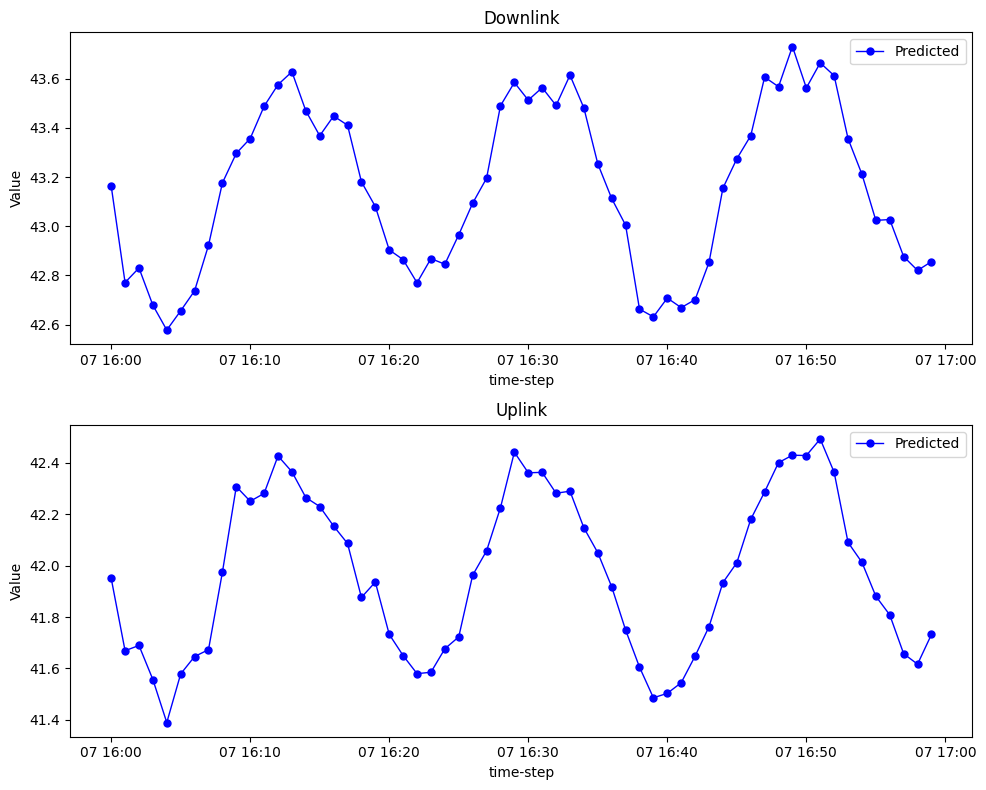

In [129]:
import matplotlib.pyplot as plt

# Assuming predictions and actual are numpy arrays of shape (900, 2)
feature_names = ['Downlink', 'Uplink']

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
time_x= actual.index + pd.DateOffset(hours=1)
#actual= actual.to_numpy()
for i in range(2):
    axs[i].plot(time_x, predictions[:, i], label='Predicted', color='blue', marker='o', linestyle='-', markersize=5, linewidth=1)
    #axs[i].plot(time_x, actual[:, i], label='Actual', color='red', marker='x', linestyle='-', markersize=5, linewidth=1)
    axs[i].set_title(feature_names[i])
    axs[i].set_xlabel('time-step')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()